In [3]:
import pandas as pd

df = pd.read_csv("troop_movements.csv")
display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-05-21 13:01:20,1,at-st,resistance,3,5,3,3,Champala
1,2024-05-21 13:01:19,2,unknown,resistance,7,8,1,6,Dathomir
2,2024-05-21 13:01:18,3,tie_silencer,empire,9,7,5,6,Mon Cala
3,2024-05-21 13:01:17,4,tie_fighter,empire,5,3,10,9,Cerea
4,2024-05-21 13:01:16,5,at-st,empire,6,3,9,9,Toydaria
...,...,...,...,...,...,...,...,...,...
995,2024-05-21 12:44:45,996,tie_silencer,empire,4,8,5,2,Stewjon
996,2024-05-21 12:44:44,997,stormtrooper,resistance,6,7,8,8,Kashyyyk
997,2024-05-21 12:44:43,998,tie_fighter,resistance,2,8,3,6,Zolan
998,2024-05-21 12:44:42,999,at-st,resistance,5,6,5,5,Troiken


In [5]:
#Look at pandas dataframe function called groupBy
#Create grouped data showing counts of empire vs resistance.
df.groupby(['empire_or_resistance', ])
eor_count = df.value_counts('empire_or_resistance')
print(eor_count)


empire_or_resistance
empire        514
resistance    486
Name: count, dtype: int64


In [8]:
#	Create grouped data showing counts of characters by homeworld
df.groupby(['homeworld', ])
hw_count = df.value_counts('homeworld')
print(hw_count)

homeworld
Iridonia        35
Muunilinst      34
Toydaria        34
Umbara          30
Vulpter         29
Trandosha       28
Skako           28
Mirial          28
Tatooine        27
Stewjon         27
Socorro         27
Mon Cala        26
Kalee           26
Kashyyyk        25
Zolan           25
Bestine IV      25
Eriadu          25
Cerea           24
Dorin           24
Dathomir        23
Aleen Minor     23
Naboo           23
Troiken         23
Quermia         23
Sullust         23
Iktotch         22
Shili           22
Rodia           22
Alderaan        22
Corellia        21
Concord Dawn    21
Tholoth         21
Champala        21
Tund            21
Dagobah         20
Chandrila       20
Ojom            20
Malastare       18
Ryloth          17
Glee Anselm     17
Serenno         15
Haruun Kal      15
Name: count, dtype: int64


In [9]:
#	Created grouped data showing counts of characters by unit_type.
df.groupby(['unit_type', ])
ut_count = df.value_counts('unit_type')
print(ut_count)

unit_type
at-st                 135
x-wing                132
resistance_soldier    131
tie_fighter           128
unknown               126
at-at                 120
tie_silencer          119
stormtrooper          109
Name: count, dtype: int64


In [11]:
#Engineer a new feature called is_resistance with a True or False value based on empire_or_resiatance
# Adding and dropping columns
df['is_resistance'] = [True if x == 'resistance' else False for x in df['empire_or_resistance']]
print(df.value_counts('is_resistance'))
display(df)


is_resistance
False    514
True     486
Name: count, dtype: int64


,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-05-21 13:01:20,1,at-st,resistance,3,5,3,3,Champala,True
1,2024-05-21 13:01:19,2,unknown,resistance,7,8,1,6,Dathomir,True
2,2024-05-21 13:01:18,3,tie_silencer,empire,9,7,5,6,Mon Cala,False
3,2024-05-21 13:01:17,4,tie_fighter,empire,5,3,10,9,Cerea,False
4,2024-05-21 13:01:16,5,at-st,empire,6,3,9,9,Toydaria,False
...,...,...,...,...,...,...,...,...,...,...
995,2024-05-21 12:44:45,996,tie_silencer,empire,4,8,5,2,Stewjon,False
996,2024-05-21 12:44:44,997,stormtrooper,resistance,6,7,8,8,Kashyyyk,True
997,2024-05-21 12:44:43,998,tie_fighter,resistance,2,8,3,6,Zolan,True
998,2024-05-21 12:44:42,999,at-st,resistance,5,6,5,5,Troiken,True


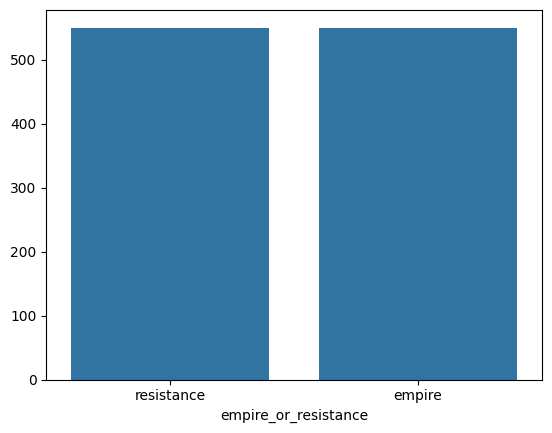

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt



count = df.value_counts('is_resistance')

sns.barplot(data=df,  x= 'empire_or_resistance', y = 550 )
plt.show()



In [45]:
# We need to find the target variable to predict
# 	use unit_type and homeworld to predict is_resistance
# 	use is_resistance as the target

# 	X = df[['homeworld', 'unit_type']]
# 	y = df[['is_resistance']]

# 	because predictive numbers only like numbers, use one Hot encoding
# 	X_encoded = pd.get_dummies(X)
	
# 	#then split data for testing and training
# 	use decision tree classifier
# 	use predict on testing data
# 		re use some code from yesterday
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df[['homeworld', 'unit_type']]
y = df['is_resistance']
#display(X)

X_encoded = pd.get_dummies(X)#this will pivot the data
#display(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier() # ->instead of logistic regression
# Fit the classifier to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
from sklearn.metrics import accuracy_score
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.525


In [47]:
importances = model.feature_importances_

print(importances) #will refer to the columns not always an even nuumner
#not matter what if you get a C you WILL fail

[0.02030032 0.02130833 0.01351602 0.01820083 0.01455028 0.01053393
 0.00450933 0.0086972  0.00457358 0.01901528 0.03050826 0.03007771
 0.01279019 0.00837462 0.00689924 0.01914926 0.01870566 0.01045885
 0.01087142 0.0120421  0.01000738 0.01225614 0.02060283 0.01480569
 0.01564539 0.00180787 0.01447963 0.005755   0.02105764 0.02018579
 0.01215776 0.0080512  0.01718574 0.01525505 0.03727312 0.03059855
 0.02633055 0.02234532 0.01659997 0.01222754 0.01337284 0.02030722
 0.08068033 0.04185549 0.02304428 0.02258983 0.0635204  0.01390897
 0.06102413 0.02998599]


In [48]:
# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)
display(feature_importances)

,Feature,Importance
42,unit_type_at-at,0.080680
46,unit_type_tie_fighter,0.063520
48,unit_type_unknown,0.061024
43,unit_type_at-st,0.041855
34,homeworld_Tholoth,0.037273
35,homeworld_Toydaria,0.030599
10,homeworld_Dorin,0.030508
11,homeworld_Eriadu,0.030078
49,unit_type_x-wing,0.029986
36,homeworld_Trandosha,0.026331


In [49]:
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})


sns.barplot(data= feature_importances,  x= '', y = 550 )
plt.show()


ValueError: Length of DataFrame vectors must match length of `data` when both are used, but `data` has length 1000 and the vector passed to `x` has length 50.